In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel("Project Dataset 1.xlsx")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
# Data Preprocessing and Cleaning
df = df.dropna(subset=['Customer ID'])
df.shape


(417534, 8)

In [6]:
df = df[df['Quantity'] > 0]
df.shape


(407695, 8)

In [7]:
df = df.drop_duplicates()
df.shape


(400947, 8)

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Customer ID'] = df['Customer ID'].astype(str)

df['TotalAmount'] = df['Quantity'] * df['Price']
df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalAmount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [9]:
df_uk = df[df['Country'] == "United Kingdom"]
df_uk.shape


(364255, 9)

C:\Users\windows 10\AppData\Local\Temp\ipykernel_5164\1618366277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Month'] = df_uk['InvoiceDate'].dt.to_period('M')


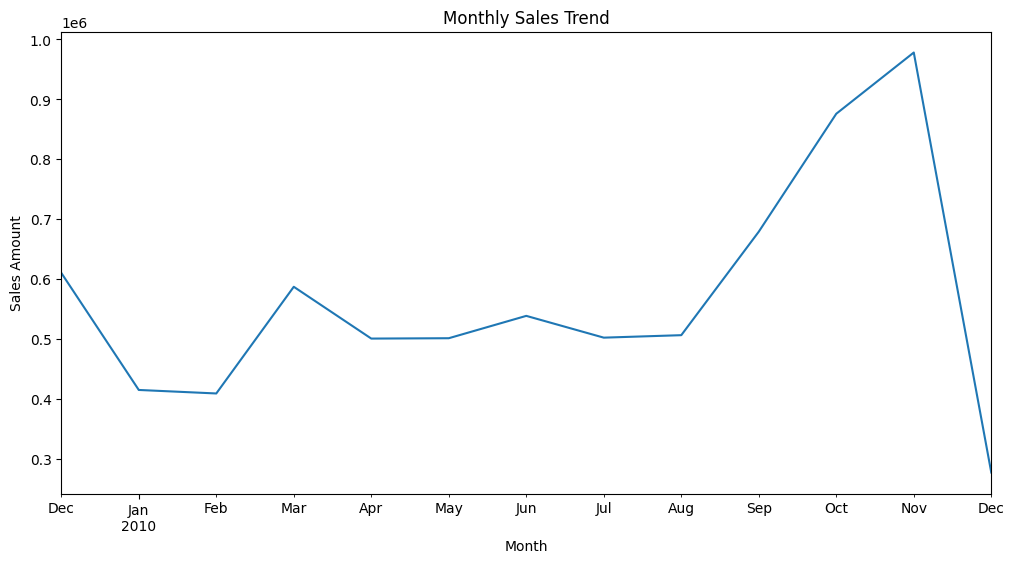

In [10]:
df_uk['Month'] = df_uk['InvoiceDate'].dt.to_period('M')
monthly_sales = df_uk.groupby('Month')['TotalAmount'].sum()

monthly_sales.plot(kind='line', title="Monthly Sales Trend", figsize=(12,6))
plt.ylabel("Sales Amount")
plt.xlabel("Month")
plt.show()


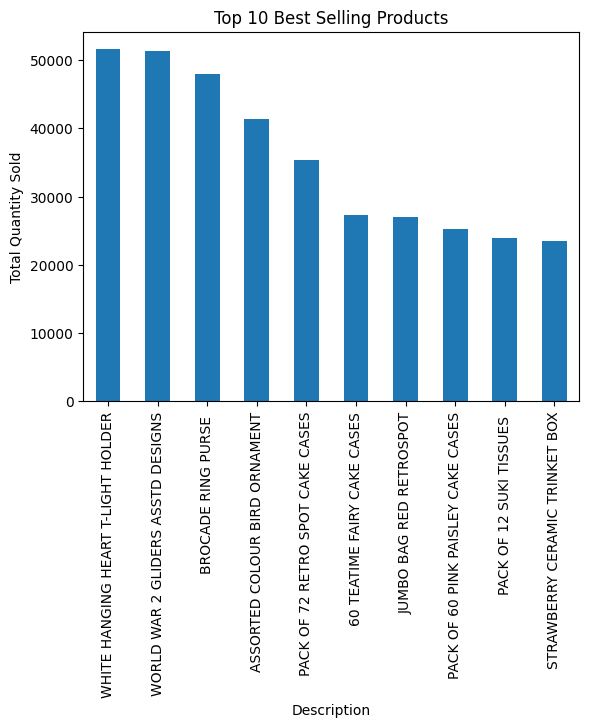

In [11]:
top_products = df_uk.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

top_products.plot(kind='bar', title="Top 10 Best Selling Products")
plt.ylabel("Total Quantity Sold")
plt.show()


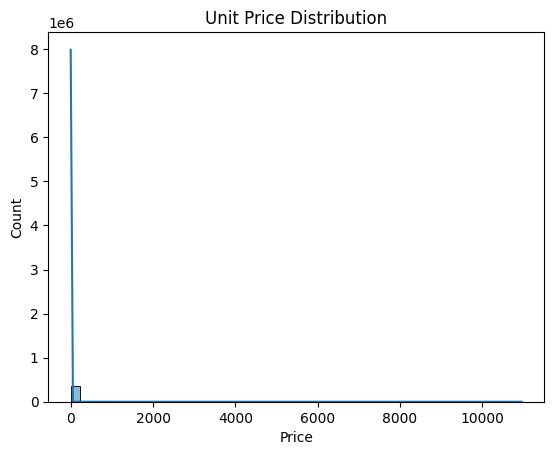

In [12]:
sns.histplot(df_uk['Price'], bins=50, kde=True)
plt.title("Unit Price Distribution")
plt.show()


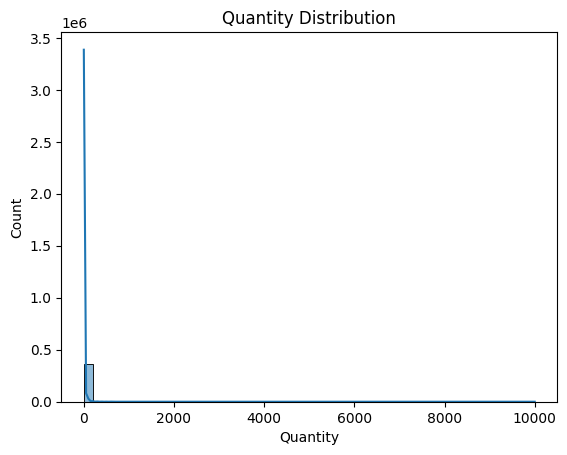

In [13]:
sns.histplot(df_uk['Quantity'], bins=50, kde=True)
plt.title("Quantity Distribution")
plt.show()


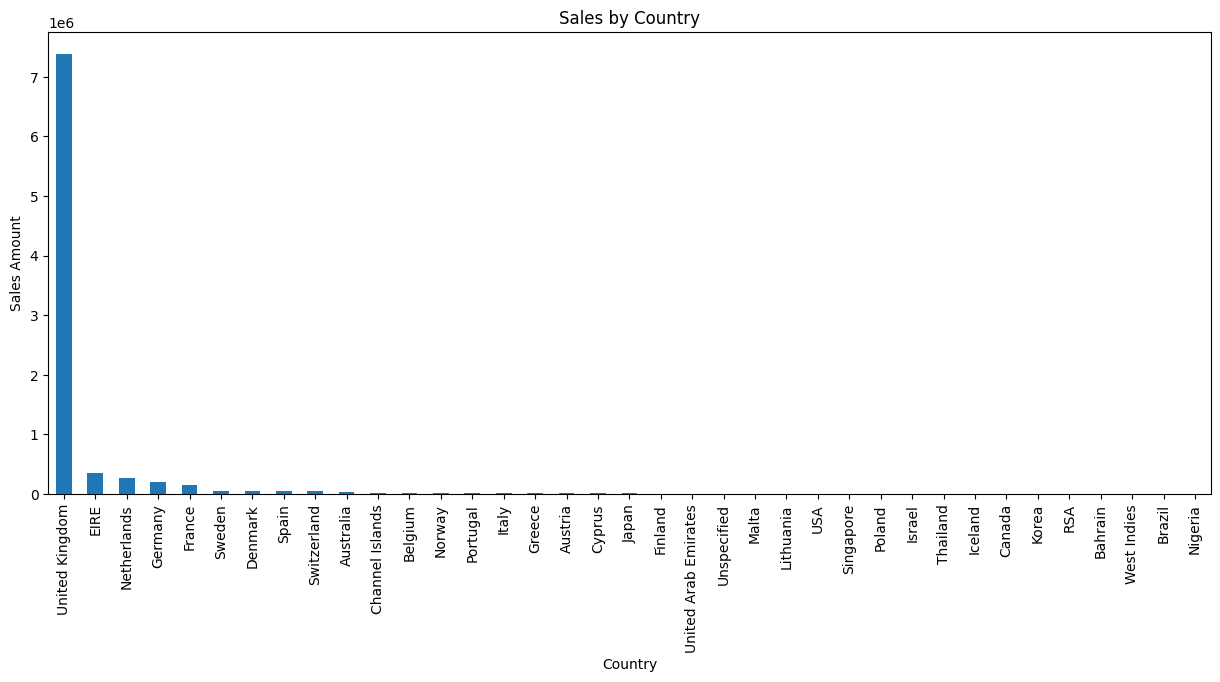

In [14]:
country_sales = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False)

country_sales.plot(kind='bar', title="Sales by Country", figsize=(15,6))
plt.ylabel("Sales Amount")
plt.show()


In [15]:
# EDA
df_uk.describe()


,Quantity,InvoiceDate,Price,TotalAmount
count,364255.000000,364255,364255.000000,364255.000000
mean,12.164352,2010-06-30 18:31:25.713909504,3.154910,20.265046
min,1.000000,2009-12-01 07:45:00,0.000000,0.000000
25%,2.000000,2010-03-25 16:38:00,1.250000,4.320000
50%,4.000000,2010-07-08 16:08:00,1.950000,10.500000
75%,12.000000,2010-10-14 16:30:00,3.750000,17.850000
max,10000.000000,2010-12-09 20:01:00,10953.500000,15818.400000
std,67.994102,NaN,30.829152,74.570396


In [17]:
top_customers = df_uk.groupby('Customer ID')['TotalAmount'].sum().sort_values(ascending=False).head(10)
top_customers


Customer ID
18102.0    349164.35
13694.0    131443.19
17511.0     84541.17
15061.0     83284.38
16684.0     80489.21
16754.0     65500.07
17949.0     60117.60
13089.0     57885.45
15311.0     55942.74
17450.0     52422.30
Name: TotalAmount, dtype: float64

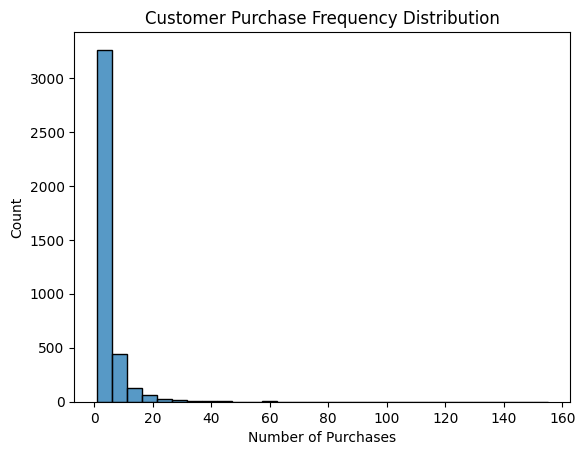

In [20]:
purchase_freq = df_uk.groupby('Customer ID')['Invoice'].nunique()

sns.histplot(purchase_freq, bins=30)
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.show()


C:\Users\windows 10\AppData\Local\Temp\ipykernel_5164\537669875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['DayOfWeek'] = df_uk['InvoiceDate'].dt.day_name()


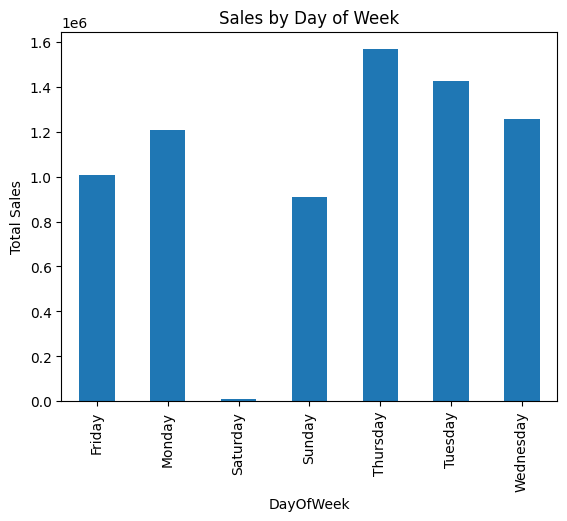

In [21]:
df_uk['DayOfWeek'] = df_uk['InvoiceDate'].dt.day_name()

sales_day = df_uk.groupby('DayOfWeek')['TotalAmount'].sum()

sales_day.plot(kind='bar', title="Sales by Day of Week")
plt.ylabel("Total Sales")
plt.show()


C:\Users\windows 10\AppData\Local\Temp\ipykernel_5164\1553673930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['MonthName'] = df_uk['InvoiceDate'].dt.month_name()


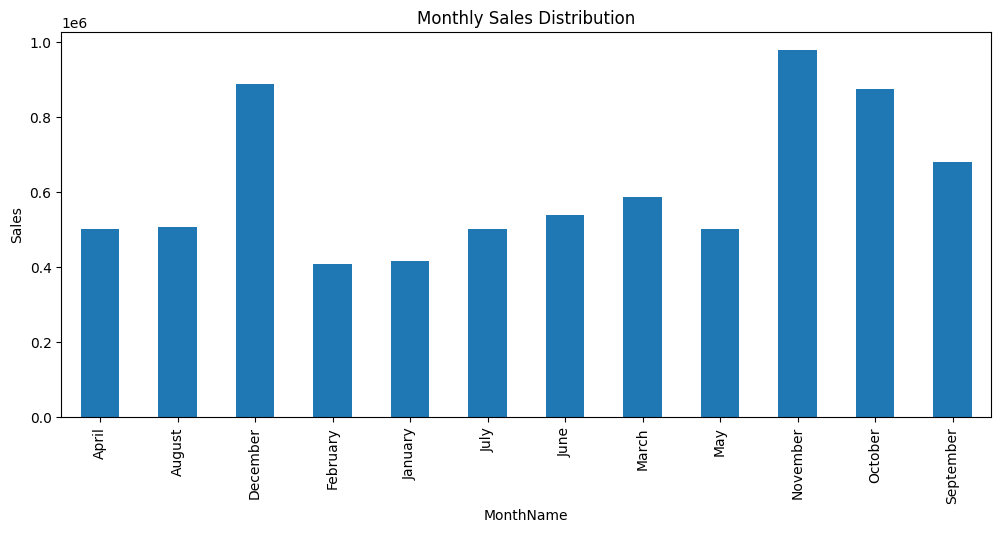

In [22]:
df_uk['MonthName'] = df_uk['InvoiceDate'].dt.month_name()

monthly_sales = df_uk.groupby('MonthName')['TotalAmount'].sum()

monthly_sales.plot(kind='bar', title="Monthly Sales Distribution", figsize=(12,5))
plt.ylabel("Sales")
plt.show()


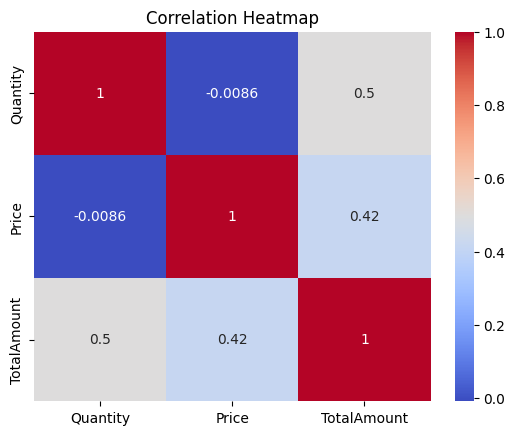

In [23]:
corr = df_uk[['Quantity', 'Price', 'TotalAmount']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


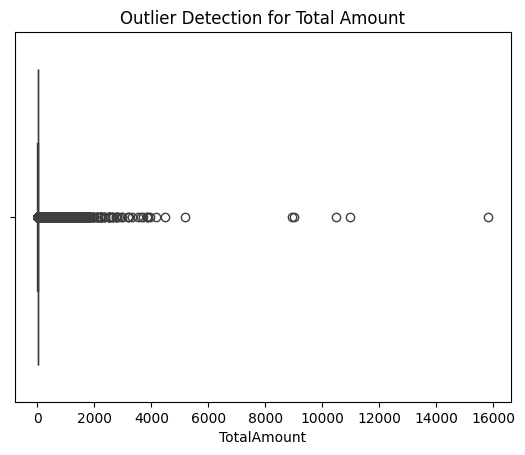

In [24]:
sns.boxplot(x=df_uk['TotalAmount'])
plt.title("Outlier Detection for Total Amount")
plt.show()


In [25]:
# Selecting features and target
reg_df = df_uk[['Quantity', 'Price', 'TotalAmount']]

reg_df.head()


,Quantity,Price,TotalAmount
0,12,6.95,83.4
1,12,6.75,81.0
2,12,6.75,81.0
3,48,2.10,100.8
4,24,1.25,30.0


In [26]:
X = reg_df[['Quantity', 'Price']]
y = reg_df['TotalAmount']


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Simple Linear Regression
from sklearn.linear_model import LinearRegression

simple_lr = LinearRegression()
simple_lr.fit(X_train[['Quantity']], y_train)

y_pred_simple = simple_lr.predict(X_test[['Quantity']])


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_simple)
mse = mean_squared_error(y_test, y_pred_simple)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_simple)

print("Simple Linear Regression Results")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

Simple Linear Regression Results
MAE : 14.210641081813957
MSE : 3095.637347851964
RMSE: 55.63845206196847
R²  : 0.25139955132645453


In [31]:
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)

y_pred_multi = multi_lr.predict(X_test)


In [32]:
mae = mean_absolute_error(y_test, y_pred_multi)
mse = mean_squared_error(y_test, y_pred_multi)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_multi)

print("Multiple Linear Regression Results")
print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


Multiple Linear Regression Results
MAE : 13.25276333959516
MSE : 2984.6275940050214
RMSE: 54.63174529524955
R²  : 0.27824441143082845


In [36]:
# Aggregate total spending per customer
customer_sales = df_uk.groupby('Customer ID')['TotalAmount'].sum().reset_index()

# Label High vs Low value customers
threshold = customer_sales['TotalAmount'].quantile(0.75)  # top 25%
customer_sales['HighValue'] = (customer_sales['TotalAmount'] >= threshold).astype(int)

customer_sales.head()


,Customer ID,TotalAmount,HighValue
0,12346.0,372.86,0
1,12608.0,415.79,0
2,12745.0,723.85,0
3,12746.0,254.55,0
4,12747.0,5061.03,1


In [40]:
# Compute total quantity and avg unit price per customer
customer_features = df_uk.groupby('Customer ID').agg({
    'TotalAmount':'sum',
    'Quantity':'sum',
    'Price':'mean'
}).reset_index()

# Merge with HighValue label
customer_data = customer_features.merge(customer_sales[['Customer ID','HighValue']], on='Customer ID')
customer_data.head()
X = customer_data[['TotalAmount','Quantity','Price']]
y = customer_data['HighValue']


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Results")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall   :", recall_score(y_test, y_pred_knn))
print("F1 Score :", f1_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


KNN Results
Accuracy : 0.9924528301886792
Precision: 0.9800995024875622
Recall   : 0.9899497487437185
F1 Score : 0.985
Confusion Matrix:
 [[592   4]
 [  2 197]]


In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1 Score :", f1_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Results
Accuracy : 0.9987421383647799
Precision: 1.0
Recall   : 0.9949748743718593
F1 Score : 0.9974811083123426
Confusion Matrix:
 [[596   0]
 [  1 198]]


In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Results")
print("Accuracy :", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall   :", recall_score(y_test, y_pred_nb))
print("F1 Score :", f1_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))


Naive Bayes Results
Accuracy : 0.9270440251572327
Precision: 0.9548387096774194
Recall   : 0.7437185929648241
F1 Score : 0.8361581920903954
Confusion Matrix:
 [[589   7]
 [ 51 148]]


In [46]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print("SVM Results")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1 Score :", f1_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


SVM Results
Accuracy : 0.9987421383647799
Precision: 1.0
Recall   : 0.9949748743718593
F1 Score : 0.9974811083123426
Confusion Matrix:
 [[596   0]
 [  1 198]]


In [47]:
# Clustering
from sklearn.preprocessing import StandardScaler

# Use features: TotalAmount, Quantity, UnitPrice
X_cluster = customer_data[['TotalAmount','Quantity','Price']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


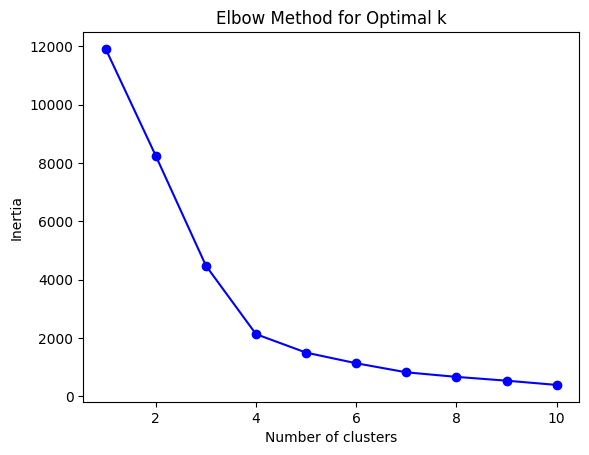

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
